In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pmdarima as pm
from pmdarima.arima import auto_arima

# Raw Stock Data Input

In [2]:
raw = pd.read_csv('NVDA_5yr.csv')
# Data Source: https://finance.yahoo.com/quote/NVDA/history?p=NVDA&guccounter=1

# EDA

In [3]:
raw.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-10-23,49.445000,49.712502,48.950001,49.154999,48.637718,42869600
1,2017-10-24,49.247501,49.687500,48.985001,49.669998,49.147293,40724400
2,2017-10-25,49.270000,49.805000,47.792500,48.415001,47.905499,82816000
3,2017-10-26,48.695000,49.040001,48.452499,48.922501,48.407654,32274400
4,2017-10-27,49.450001,50.467499,49.187500,50.465000,49.933937,57219200


In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [5]:
# No missing values
# Date is in object type -> convert to datetime object & set as index
raw['Date'] = pd.to_datetime(raw['Date'])
raw.set_index('Date', inplace=True)

In [6]:
# Keep only closing price for the model
df = pd.DataFrame(raw['Close'])
df.head()

,Close
Date,
2017-10-23,49.154999
2017-10-24,49.669998
2017-10-25,48.415001
2017-10-26,48.922501
2017-10-27,50.465000


### Time Series of Closing Price

Text(0.5, 1.0, 'NVDA Closing Price')

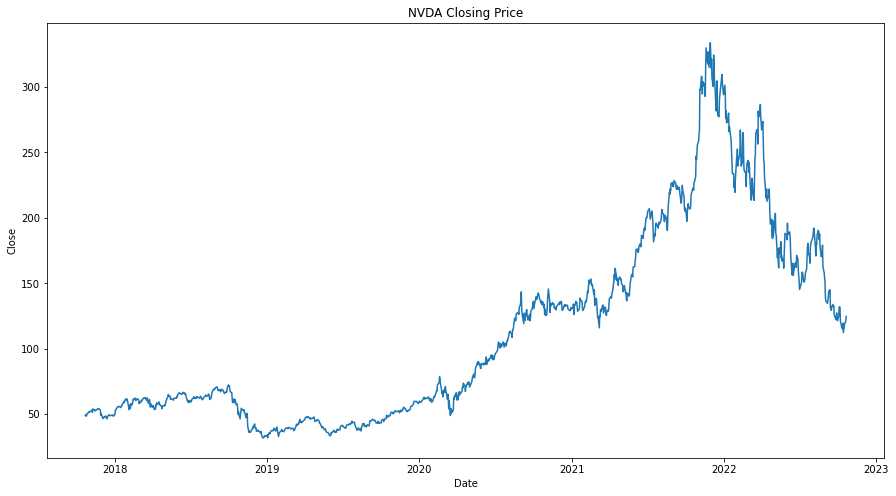

In [7]:
plt.figure(figsize = (15,8))
sns.lineplot(x = 'Date', y = 'Close', data = df)
plt.title ('NVDA Closing Price')

In [8]:
# Trend Reversal: Macro data useful here?

### Stationarity

#### Dickey-Fuller Test

In [9]:
import statsmodels.api as sm

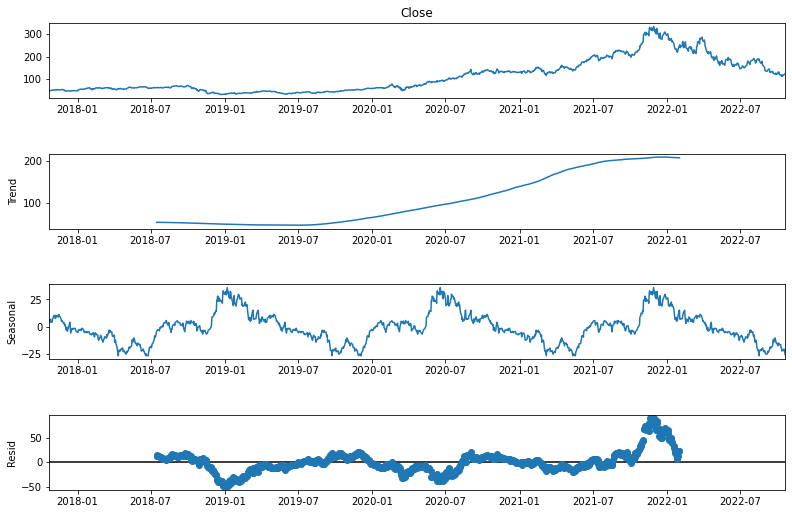

In [10]:
res = sm.tsa.seasonal_decompose(df['Close'],period=365)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(12)
plt.show()

In [11]:
from statsmodels.tsa.stattools import adfuller
res = sm.tsa.adfuller(df['Close'],regression='ct')
res[1] # p-value > 0.05 -> non-stationary -> use auto arima to determine desirable parameter values

0.8383811021005569

# Auto ARIMA to determine p,d,q

In [12]:
model = auto_arima(df, max_order = 5, suppress_warnings = True, stepwise = True, trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7399.788, Time=1.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7403.477, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7402.574, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7402.414, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7401.693, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7401.334, Time=0.48 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7401.140, Time=0.29 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=7403.657, Time=0.70 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=7403.367, Time=0.97 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7404.070, Time=0.27 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=7404.262, Time=0.47 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=7403.018, Time=0.53 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.62 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=7397.982, Time=0.96 sec
 ARIMA(1,1,2)(0,0,0)[0]             : 

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1259
Model:               SARIMAX(5, 1, 4)   Log Likelihood               -3682.736
Date:                Sun, 23 Oct 2022   AIC                           7385.472
Time:                        11:43:13   BIC                           7436.845
Sample:                             0   HQIC                          7404.779
                               - 1259                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7067      0.071      9.985      0.000       0.568       0.845
ar.L2         -0.1770      0.109     -1.625      0.104      -0.390       0.036
ar.L3         -0.5072      0.107     -4.745      0.000      -0.717      -0.298
ar.L4          0.6906      0.080      8.612      0.000       0.533       0.848
ar.L5          0.1080      0.018      6.017      0.000       0.073       0.143
ma.L1         -0.7584      0.067    -11.255      0.000      -0.890      -0.626
ma.L2          0.2082      0.104      1.995      0.046       0.004       0.413
ma.L3          0.5328      0.100      5.355      0.000       0.338       0.728
ma.L4         -0.7704      0.078     -9.844      0.000      -0.924      -0.617
sigma2        20.3258      0.411     49.394      0.000      19.519      21.132
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              2305.83
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):              24.23   Skew:                             0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Prediction

In [14]:
pred = pd.DataFrame(model.predict(n_periods = 10)).rename(columns={0:'Close'})
pred

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,Close
1259,124.221265
1260,124.707318
1261,125.961981
1262,125.602584
1263,124.870759
1264,124.069047
1265,124.733258
1266,125.603034
1267,125.962614
1268,125.093192


# Visualisation of Predictions

In [15]:
s= pd.date_range('2022-10-24', '2022-11-10', freq='D')
dayofweek = pd.DataFrame(s.to_series().dt.dayofweek).rename(columns={0:'day'})
dayofweek = dayofweek[dayofweek['day']<5]
pred_index = dayofweek[dayofweek.index<='2022-11-04'].index

In [16]:
pred_plot = pred.copy()
pred_plot['Date']=pred_index
pred_plot.set_index('Date',inplace=True)
pred_plot

,Close
Date,
2022-10-24,124.221265
2022-10-25,124.707318
2022-10-26,125.961981
2022-10-27,125.602584
2022-10-28,124.870759
2022-10-31,124.069047
2022-11-01,124.733258
2022-11-02,125.603034
2022-11-03,125.962614


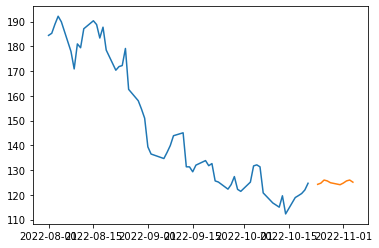

In [17]:
plt.plot(df[df.index>='2022-08-01']) # plot for smaller time frame for clearer visualisation
plt.plot(pred_plot)

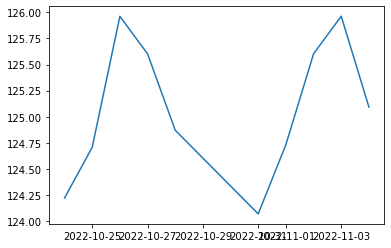

In [18]:
plt.plot(pred_plot)

# Output

In [19]:
pred['Index'] = list(range(10))
pred.set_index('Index',inplace=True)
pred.to_csv('Pan_Yumo_Impl_2.csv')